In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive
import glob
from matplotlib import pyplot as plt
import sys
import copy

drive.mount('/content/drive')

Mounted at /content/drive


image_0 Index 0/991...
image_0 Index 100/991...
image_0 Index 200/991...
image_0 Index 300/991...
image_0 Index 400/991...
image_0 Index 500/991...
image_0 Index 600/991...
image_0 Index 700/991...
image_0 Index 800/991...
image_0 Index 900/991...
image_1 Index 0/991...
image_1 Index 100/991...
image_1 Index 200/991...
image_1 Index 300/991...
image_1 Index 400/991...
image_1 Index 500/991...
image_1 Index 600/991...
image_1 Index 700/991...
image_1 Index 800/991...
image_1 Index 900/991...

Biggest improvement : 82

Baseline Dataset:


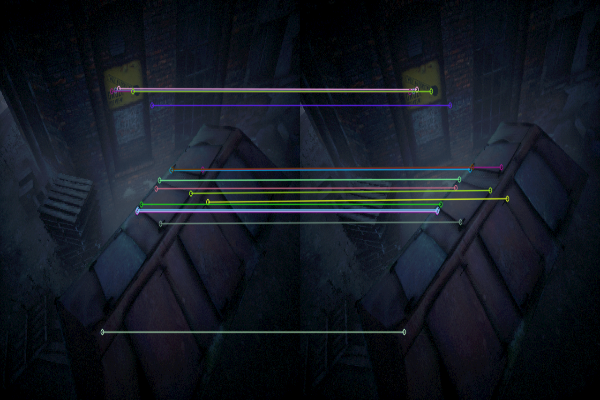


Enhanced Dataset:


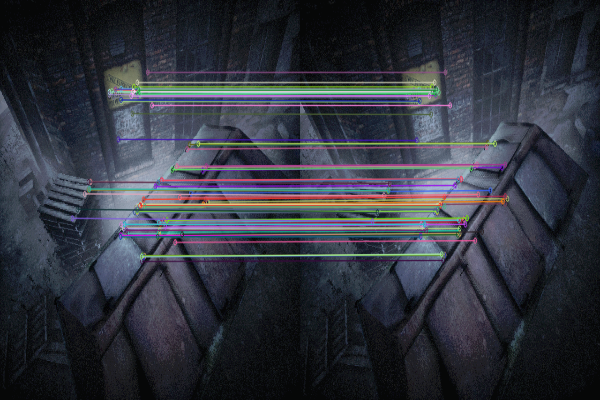

In [2]:
# Method to get the number of good feature matches between two images
def get_num_good_matches(cur_img, next_img, orb, bf, ratio_threshold):
  # Detect keypoints and descriptors
  cur_keypoints, cur_descriptors = orb.detectAndCompute(cur_img, None)
  next_keypoints, next_descriptors = orb.detectAndCompute(next_img, None)
  # Get matches
  matches = bf.knnMatch(cur_descriptors, next_descriptors, k=2)
  # Apply ratio test to keep only good matches
  good_matches = []
  for m,n in matches:
    if m.distance < ratio_threshold * n.distance:
      good_matches.append([m])
  # Get number of good matches
  num_good_matches = len(good_matches)
  return num_good_matches

# Set directory for all images in the dataset
dataset_path = '/content/drive/MyDrive/Mobile Robotics Project/Image Enhancement/Datasets/Full Dataset/AHE 4'
baseline_dataset_path = '/content/drive/MyDrive/Mobile Robotics Project/Full Dataset/ABF'

# Get the directory for the image_0 and image_1 paths
image_0_paths = sorted(glob.glob(f'{dataset_path}/image_0/*.png'))
image_1_paths = sorted(glob.glob(f'{dataset_path}/image_1/*.png'))
image_0_baseline_paths = sorted(glob.glob(f'{baseline_dataset_path}/image_0/*.png'))
image_1_baseline_paths = sorted(glob.glob(f'{baseline_dataset_path}/image_1/*.png'))

# Check if the full dataset is picked up
dataset_size = 991
if len(image_0_paths) != dataset_size or len(image_1_paths) != dataset_size or len(image_0_baseline_paths) != dataset_size or len(image_1_baseline_paths) != dataset_size:
  print(f'ERROR - Full dataset not picked up')
  sys.exit()

# Initialize the tracker for the biggest improvement
biggest_improvement = {
    'offset_num_good_matches' : -1,
    'idx' : -1,
    'cur_img' : '',
    'next_img' : '',
    'baseline_cur_img' : '',
    'baseline_next_img' : ''
}

# Initialize orb detector, matcher, and threshold ratio for ratio test
orb = cv2.ORB_create()
bf = cv2.BFMatcher()
ratio_threshold = .6

#Loop through all image_0
for i in range(len(image_0_paths)-2):

  # Print progress
  if True and i % 100 == 0:
    print(f'image_0 Index {i}/{dataset_size}...')

  # Get the current and next image_0 and image_1 image
  image_0_cur = cv2.imread(image_0_paths[i])
  image_0_next = cv2.imread(image_0_paths[i+1])
  num_good_matches = get_num_good_matches(image_0_cur, image_0_next, orb, bf, ratio_threshold)

  # Get the current and next image_0 and image_1 image
  baseline_image_0_cur = cv2.imread(image_0_baseline_paths[i])
  baseline_image_0_next = cv2.imread(image_0_baseline_paths[i+1])
  baseline_num_good_matches = get_num_good_matches(baseline_image_0_cur, baseline_image_0_next, orb, bf, ratio_threshold)

  # Get the improvement in good matches between dataset and baseline dataset
  offset_num_good_matches = num_good_matches - baseline_num_good_matches

  # Check if it had the best improvement
  if biggest_improvement['offset_num_good_matches'] < offset_num_good_matches:
    biggest_improvement['offset_num_good_matches'] = copy.deepcopy(offset_num_good_matches)
    biggest_improvement['idx'] = copy.deepcopy(i)
    biggest_improvement['cur_img'] = copy.deepcopy(image_0_cur)
    biggest_improvement['next_img'] = copy.deepcopy(image_0_next)
    biggest_improvement['baseline_cur_img'] = copy.deepcopy(baseline_image_0_cur)
    biggest_improvement['baseline_next_img'] = copy.deepcopy(baseline_image_0_next)

#Loop through all image_1
for i in range(len(image_1_paths)-2):

  # Print progress
  if True and i % 100 == 0:
    print(f'image_1 Index {i}/{dataset_size}...')

  # Get the current and next image_0 and image_1 image
  image_1_cur = cv2.imread(image_1_paths[i])
  image_1_next = cv2.imread(image_1_paths[i+1])
  num_good_matches = get_num_good_matches(image_1_cur, image_1_next, orb, bf, ratio_threshold)

  # Get the current and next image_0 and image_1 image
  baseline_image_1_cur = cv2.imread(image_1_baseline_paths[i])
  baseline_image_1_next = cv2.imread(image_1_baseline_paths[i+1])
  baseline_num_good_matches = get_num_good_matches(baseline_image_1_cur, baseline_image_1_next, orb, bf, ratio_threshold)

  # Get the improvement in good matches between dataset and baseline dataset
  offset_num_good_matches = num_good_matches - baseline_num_good_matches

  # Check if it had the best improvement
  if biggest_improvement['offset_num_good_matches'] < offset_num_good_matches:
    biggest_improvement['offset_num_good_matches'] = copy.deepcopy(offset_num_good_matches)
    biggest_improvement['idx'] = copy.deepcopy(i)
    biggest_improvement['cur_img'] = copy.deepcopy(image_1_cur)
    biggest_improvement['next_img'] = copy.deepcopy(image_1_next)
    biggest_improvement['baseline_cur_img'] = copy.deepcopy(baseline_image_1_cur)
    biggest_improvement['baseline_next_img'] = copy.deepcopy(baseline_image_1_next)

# Draw the feature matches
def draw_matches(cur_img, next_img, orb, bf, ratio_threshold):
  # Detect keypoints and descriptors
  cur_keypoints, cur_descriptors = orb.detectAndCompute(cur_img, None)
  next_keypoints, next_descriptors = orb.detectAndCompute(next_img, None)
  # Get matches
  matches = bf.knnMatch(cur_descriptors, next_descriptors, k=2)
  # Apply ratio test to keep only good matches
  good_matches = []
  for m,n in matches:
    if m.distance < ratio_threshold * n.distance:
      good_matches.append([m])
  # Create image with feature matches
  matches_img = cv2.drawMatchesKnn(cur_img, cur_keypoints, next_img, next_keypoints, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  matches_img = cv2.resize(matches_img, (600,400))
  return matches_img

# Display the best image
print(f'\nBiggest improvement : {biggest_improvement["offset_num_good_matches"]}\n')
print(f'\nIndex : {biggest_improvement["idx"]}\n')
print('Baseline Dataset:')
img_matches = draw_matches(biggest_improvement['baseline_cur_img'], biggest_improvement['baseline_next_img'], orb, bf, ratio_threshold)
cv2_imshow(img_matches)
print('\nEnhanced Dataset:')
img_matches = draw_matches(biggest_improvement['cur_img'], biggest_improvement['next_img'], orb, bf, ratio_threshold)
cv2_imshow(img_matches)

In [3]:
print(f'\nIndex : {biggest_improvement["idx"]}\n')


Index : 125

